In [14]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([1, x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([1, x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.scatter(xs, ys)

In [21]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def MSE(weights):
    localPoints = np.array(list(map(lambda x: (x[1] - weights[3])**2 + (x[2] - weights[4])**2 <= radius**2, points)))
    predictions = logisticPrediction(weights, points)
    return 1.0/2.0 * np.sum(np.power((targets - predictions), 2))

def logisticPrediction(weights, p):
    return np.array(list(map(lambda x: predict(weights, x), p))) 
    
def predict(weights, inputs):
    n = np.array([weights[0], weights[1], weights[2]])
    i = np.array([1, weights[3] - inputs[1], weights[4] - inputs[2]])
#     n = np.array([weights[0], weights[1] - weights[3], weights[2] - weights[4]])
    return sigmoid(np.dot(n, i))

In [22]:
def computeGradient(weights, example, target):
    prediction = predict(weights, example)
    dE_dO = computeErrorDifferential(prediction, target)
    
    dO_dZ = prediction * (1-prediction)
    
    dZ_d0 = example[0]
    dZ_d1 = (weights[3] - example[1])
    dZ_d2 = (weights[4] - example[2])
    dZ_d3 = weights[1]
    dZ_d4 = weights[2]
    
    dE_dZ = dE_dO * dO_dZ
    
    grad = np.zeros(len(weights))#[0.0, 0.0, 0.0]
    grad[0] = dZ_d0 * dE_dZ
    grad[1] = dZ_d1 * dE_dZ
    grad[2] = dZ_d2 * dE_dZ
    grad[3] = dZ_d3 * dE_dZ
    grad[4] = dZ_d4 * dE_dZ
    
    return grad

def computeErrorDifferential(prediction, target):
    return -(target - prediction)

In [27]:
def trainBoundaryHunter():
    weights = np.array([0.0, 0.0, 0.0, 0.0, 0.0])
    
    print("Initial Loss: ", MSE(weights))
    for i in range(0, 10000):
        weights = computeStep(weights)
    
        if i % 1000 == 0:
            print("Loss After [i = " + str(i) + "]: " + str(MSE(weights)))
            print(weights)
            
    print("Trained Loss: ", MSE(weights))    
    print("Weights: ", weights)
    return weights

def computeStep(weights):
    localPoints = np.array(list(map(lambda x: (x[1] - weights[3])**2 + (x[2] - weights[4])**2 <= radius**2, points)))
    
    totalG = np.zeros(len(weights))
    for i in range(0, len(points)):
        if not localPoints[i]:
            continue
        
        g = computeGradient(weights, points[i], targets[i])
        totalG += g     
    
    weights -= totalG * 0.01
    return weights

Type 0:  35
Type 1:  65
Initial Loss:  12.5
Loss After [i = 0]: 12.4803002354
[ 0.0025 -0.0011 -0.0022  0.      0.    ]
Loss After [i = 1000]: 6.35147831286
[ 0.2433982  -0.37644077 -2.04007285 -0.01966117 -0.05934831]
Loss After [i = 2000]: 5.74395546851
[ 0.25009513 -0.54646562 -3.44157726 -0.02255009 -0.07587561]
Loss After [i = 3000]: 5.6696115669
[ 0.25396456 -0.63844402 -4.43934282 -0.02484901 -0.09119059]
Loss After [i = 4000]: 5.67956533305
[ 0.25626818 -0.71187827 -5.26635861 -0.02639986 -0.10230702]
Loss After [i = 5000]: 5.71304984356
[ 0.25768174 -0.76826043 -5.97617125 -0.02744501 -0.11022892]
Loss After [i = 6000]: 5.76851369031
[ 0.25842149 -0.80981319 -6.60407754 -0.0280252  -0.11481846]
Loss After [i = 7000]: 5.8073699629
[ 0.25910063 -0.83574372 -7.18767107 -0.02858468 -0.1195125 ]
Loss After [i = 8000]: 5.83803274322
[ 0.25960275 -0.86426703 -7.69983504 -0.02901289 -0.12327277]
Loss After [i = 9000]: 5.8542354055
[ 0.26009387 -0.88556439 -8.1716426  -0.02944261 -0.12

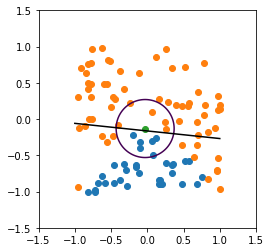

In [28]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

radius = 0.4

weights = trainBoundaryHunter()

plt.scatter(weights[3], weights[4])

n = np.array([weights[0] + weights[1] * weights[3] + weights[2] * weights[4], 
              -weights[1], 
              -weights[2]])

byas = -1 * n[0]/n[2]
Xcoef = -1 * n[1]/n[2]

print()
print(n)
print("\nLine")
print("B: " + str(byas))
print("XCoef: " + str(Xcoef))


x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = (X - weights[3])**2 + (Y - weights[4])**2 - radius**2
plt.contour(X,Y,F,[0])

plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()